In [1]:
!python --version

Python 3.7.16


In [1]:
from Agent import Agent

import torch

import numpy as np
import pandas as pd

import os
import sys
os.chdir("..")
from rice_nego import Rice

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
# envs_2_regions = [Rice(region_yamls_filename='2_region_yamls/') for _ in range(5)]
# initial_state_2 = envs_2_regions[0].reset()

# envs_4_regions = [Rice(region_yamls_filename='identical_region_yamls/') for _ in range(5)]
# initial_state_4 = envs_4_regions[0].reset()

In [3]:
# agents_2 = [Agent(envs_2_regions[0], initial_state_2[agent_id], agent_id) 
#             for agent_id in range(envs_2_regions[0].num_agents)]
# agents_4 = [Agent(envs_4_regions[0], initial_state_4[agent_id], agent_id) 
#             for agent_id in range(envs_4_regions[0].num_agents)]

In [2]:
env = Rice(id = 0, region_yamls_filename='2_region_yamls', num_discrete_action_levels=5)

In [3]:
state = env.reset()

In [7]:
a = np.zeros(env.episode_length * 1_000)
for i in tqdm(range(1000)):
    state = env.reset()
    for step in range(env.episode_length):
        state, reward, _, _ = env.step({
            j : np.random.randint(5, size = len(env.action_space[0]))
            for j in range(2)
        })
        a[i * env.episode_length + step] = reward[0]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.38it/s]


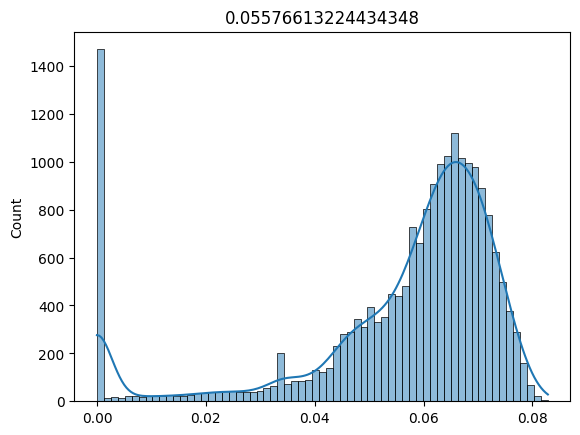

In [9]:
sns.histplot(a, kde = True)
plt.title(a.mean())
plt.show()

In [4]:
def get_actions():
    return {
        i : {
            'decisions' : np.random.randint(2, size=(1,1)),
            'proposals' : np.random.randint(2, size=(1,35)),
            'promises' : np.random.randint(2, size=(1,35))
        }
        for i in (0, 1)
    }

In [5]:
env.reset()
for step in tqdm(range(env.episode_length)):
    for i in range(env.max_negotiation_steps):
        new_state = env.register_proposals(get_actions())

        actions2 = get_actions()
        new_state = env.register_decisions(actions2)
    
    env.step({
        j : np.random.randint(5, size = len(env.action_space[0]))
        for j in range(2)
    })

100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.59it/s]


In [6]:
env.timestep

20

In [11]:
list(map(lambda x: x[0][0], env.global_negotiation_state['action_masks']))

[array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
  

In [53]:
env.global_negotiation_state['negotiation_status'][0]

[{0: {1: False}, 1: {0: False}},
 {0: {1: False}, 1: {0: False}},
 {0: {1: False}, 1: {0: False}},
 {0: {1: False}, 1: {0: False}},
 {0: {1: False}, 1: {0: False}}]

In [54]:
env.global_negotiation_state['decisions'][0]

[{0: {1: array([0])}, 1: {0: array([0])}},
 {0: {1: array([0])}, 1: {0: array([0])}},
 {0: {1: array([0])}, 1: {0: array([0])}},
 {0: {1: array([0])}, 1: {0: array([0])}},
 {0: {1: array([0])}, 1: {0: array([0])}}]

In [16]:
actions2

{0: {'decisions': array([[0]]),
  'proposals': array([[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
          1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0]]),
  'promises': array([[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
          0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1]])},
 1: {'decisions': array([[0]]),
  'proposals': array([[0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
          1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1]]),
  'promises': array([[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
          0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1]])}}

In [2]:
def create_agent(env, state, id):
    return Agent(len(state[id]['features']), env.action_space[id], env.num_regions, env.message_length, id = id)

In [3]:
envs = [Rice(id = i, region_yamls_filename='identical_region_yamls', num_discrete_action_levels=5) for i in range(5)]
initial_state = envs[0].reset()
agents = [create_agent(envs[0], initial_state, agent_id) for agent_id in range(envs[0].num_regions)]

In [4]:
def negotiate_proposals(agents, envs, states):
    
    # Act
    collective_action = {}
    for agent in agents:
        collective_action[agent.id] = agent.negotiate(
            [state[agent.id] for state in states],
            save_map = {
                'save_state' : True,
                'save_decisions' : False,
                'save_proposals_promises' : True
            }
        )
        
    # Register actions in the environment and take rewards
    new_states = []
    for env_id in range(len(envs)):
        state = envs[env_id].register_proposals({
            agent_id: {
                identifier: action[env_id]
                for identifier, action in action_dict.items()
            }
            for agent_id, action_dict in collective_action.items()
        })
        
        new_states.append(state)
        
    return new_states

In [5]:
def negotiate_decisions(agents, envs, states):
    
    # Act
    collective_action = {}
    for agent in agents:
        collective_action[agent.id] = agent.negotiate(
            [state[agent.id] for state in states],
            save_map = {
                'save_state' : False,
                'save_decisions' : True,
                'save_proposals_promises' : False
            }
        )
        
    # Register actions in the environment and take rewards
    all_rewards, new_states = [], []
    for env_id in range(len(envs)):
        state, rewards = envs[env_id].register_decisions({
            agent_id: {
                identifier: action[env_id]
                for identifier, action in action_dict.items()
            }
            for agent_id, action_dict in collective_action.items()
        })
        
        all_rewards.append(rewards)
        new_states.append(state)
        
    return new_states, np.array(all_rewards)

In [6]:
def act_collectively(agents, envs, states, with_mask = True):
    collective_action = {}
    for agent in agents:
        collective_action[agent.id] = agent.act(
            [state[agent.id] for state in states],
            with_mask = with_mask
        )
        
    states, rewards, _, _ = zip(*[
        env.step({agent_id : collective_action[agent_id][i] 
                for agent_id in range(len(agents))}) 
        for (i, env) in enumerate(envs)
    ])
    return states, rewards

In [7]:
# rs_difference = {agent.id : [] for agent in agents}
rs_negotiation = {agent.id : [] for agent in agents}

episode_length = envs[0].episode_length
negotiation_steps = envs[0].max_negotiation_steps

# The terminal states are the same every time
is_terminals = np.zeros(len(envs) * negotiation_steps, dtype = bool)
is_terminals[range(negotiation_steps - 1, len(is_terminals), negotiation_steps)]

for epoch in tqdm(range(20)):
    
    for batch in range(10):
        states = [env.reset() for env in envs]
        for t in range(episode_length):
            
            for agent in agents:
                agent.reset_negotiation_hs()

            all_rewards = [[]] * negotiation_steps
            
            for step in range(negotiation_steps):
                states = negotiate_proposals(agents, envs, states)
                states, all_rewards[step] = negotiate_decisions(agents, envs, states)
                b
            
            states, rewards = act_collectively(agents, envs, states)
            all_rewards_actions = np.array([list(reward.values()) for reward in rewards])
            
            all_rewards_actions_repeated = np.repeat(all_rewards_actions, negotiation_steps, axis = 0)
            all_rewards_decisions = np.concatenate(all_rewards_decisions) * all_rewards_actions_repeated
            all_rewards_proposals = np.concatenate(all_rewards_proposals) * all_rewards_actions_repeated
            
            
            for agent in agents:
                agent.nets['negotiationNet'].buffer.rewards_decisions.extend(all_rewards_decisions[:, agent.id])
                agent.nets['negotiationNet'].buffer.rewards_proposals.extend(all_rewards_proposals[:, agent.id])
                agent.nets['negotiationNet'].buffer.is_terminals.extend(is_terminals)
                agent.nets['activityNet'].buffer.rewards.extend(all_rewards_actions[:, agent.id])
                agent.nets['activityNet'].buffer.is_terminals.extend([t == episode_length - 1] * len(envs))
    for agent in agents:
        agent.update()

  0%|                                                    | 0/20 [00:00<?, ?it/s]


NameError: name 'b' is not defined

In [20]:
np.zeros(1)

array([0.])

In [19]:
envs[0].global_negotiation_state['decisions'][0][0][0][1]

array([1])

In [12]:
envs[0].global_negotiation_state['promises'][0][0][0][1].shape

(11, 5)

In [10]:
states[0]

{0: {'features': array([1.00000000e+00, 0.00000000e+00, 8.50000009e-02, 6.79999997e-04,
         8.51000026e-02, 4.60000001e-02, 1.73999995e-01, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 2.64167495e-04, 2.64167495e-04,
         0.00000000e+00, 0.00000000e+00, 3.81011097e-03, 3.81011097e-03,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 1.21579361e-01, 3.50444198e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
  'action_mask': array([[0, 0, 1, 1, 0],
         [1, 1, 1, 0, 0],
         [1, 0, 1, 0, 1],
         [0, 0, 1, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 0, 0, 1, 1],
         [0, 0, 0, 1, 0]]

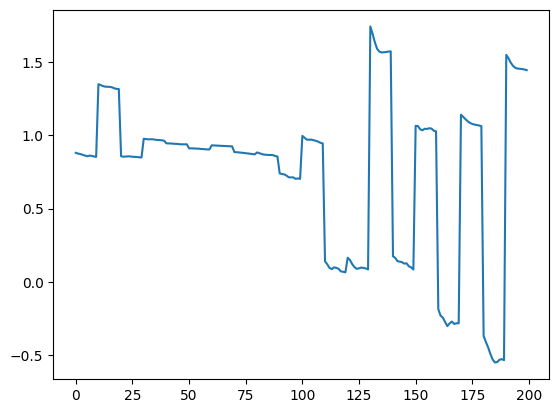

In [10]:
plt.plot(agents[1].nets['negotiationNet'].loss_collection)

In [16]:
envs[0].decisions

{0: {1: array(0)}, 1: {0: array(0)}}